# Agents

Agents are composed of body parts and sensors.
We will use an already implemented agent composed of a Base and a Head.

We are going to attach sensors to this agent.

In [1]:
from simple_playgrounds.playgrounds.layouts import SingleRoom
from simple_playgrounds.engine import Engine
from simple_playgrounds.agents.parts.controllers import Keyboard
from simple_playgrounds.agents.agents import BaseAgent, HeadAgent

# to display the sensors
import cv2

%matplotlib inline
import matplotlib.pyplot as plt

def plt_image(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    

pygame 2.0.1 (SDL 2.0.14, Python 3.7.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


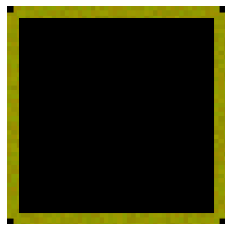

In [2]:
import math
my_playground = SingleRoom(size=(200, 200))
my_agent = HeadAgent( controller=Keyboard(), interactive = True)

# we use the option screen=True to use a keyboard controlled agent later on.
engine = Engine(time_limit=1000000, playground= my_playground, screen=False)

plt_image(engine.generate_playground_image(plt_mode = True))

## Adding scene elements 

Now lets add some scene element to the playground, that the agent will be able to perceive.

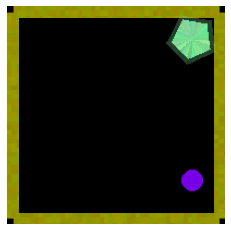

In [3]:
from simple_playgrounds.elements.collection.basic import Physical

circular_object = Physical(config_key='pentagon', graspable=True, mass = 10)
my_playground.add_element(circular_object, ((170, 30), 0.5))

circular_object = Physical(physical_shape='circle', radius=10, texture = [120, 0, 230])
my_playground.add_element(circular_object, ((170, 160), -0.5))

plt_image(engine.generate_playground_image(plt_mode = True))

## Adding sensors to the agent 

Ok Great! Now we will add 2 rgb sensors: one attached to the head, one attached to the body.

Note that the properties of the sensors can be changed with keyword arguments.

Move the agent with keyboard arrows, and its head with `n` and `m` and terminate with `q`.

The animated window will appear outside of the notebook.

In [4]:
from simple_playgrounds.agents.sensors import RgbCamera, Lidar, SemanticCones

my_agent.add_sensor(RgbCamera(my_agent.head, invisible_elements=my_agent.parts, fov=60, range=150))

my_playground.add_agent(my_agent)


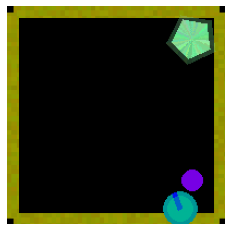

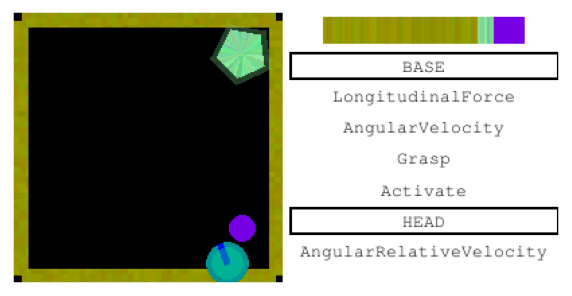

In [5]:

engine = Engine(time_limit=1000000, playground= my_playground, screen=True)
engine.update_observations()
plt_image(engine.generate_playground_image(plt_mode = True))
plt.figure(figsize=(10,10))
plt_image(engine.generate_agent_image(my_agent, plt_mode = True))

while engine.game_on:

    engine.update_screen()

    actions = {}
    for agent in engine.agents:
        actions[agent] = agent.controller.generate_actions()

    terminate = engine.step(actions)
    engine.update_observations()

    cv2.imshow('agent', engine.generate_agent_image(my_agent) )
    cv2.waitKey(20)
    
    if terminate:
        engine.terminate()

engine.terminate()
cv2.destroyAllWindows()

## Lets add all sensors and move around

We load a test playground.

(234, 100, 3)


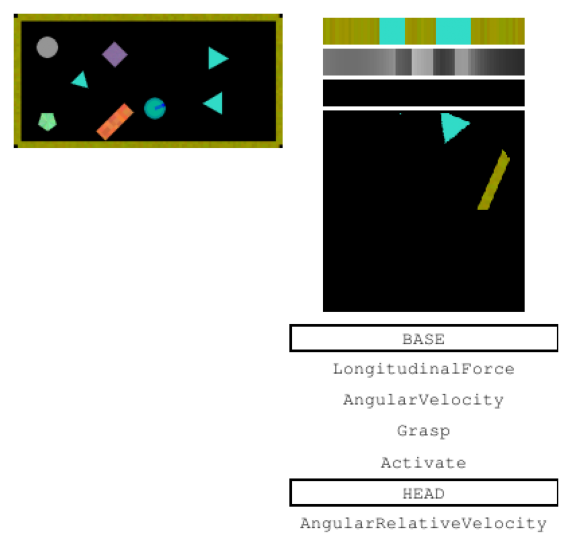

In [6]:
from simple_playgrounds.playgrounds.collection.test import Basics
from simple_playgrounds.agents.sensors import RgbCamera, TopdownSensor, Touch, Lidar

my_playground = Basics()
my_agent = HeadAgent( controller=Keyboard(), interactive=True)

my_agent.add_sensor(RgbCamera(my_agent.base_platform, invisible_elements=my_agent.parts))
my_agent.add_sensor(Lidar(my_agent.base_platform, invisible_elements=my_agent.parts))
my_agent.add_sensor(Touch(my_agent.base_platform, invisible_elements=my_agent.parts ))
my_agent.add_sensor(TopdownSensor(my_agent.base_platform, invisible_elements=my_agent.parts))

my_playground.add_agent(my_agent)

# we use the option screen=True to use a keyboard controlled agent later on.
engine = Engine(time_limit=1000000, playground= my_playground, screen=True)


engine.update_observations()
#plt_image(engine.generate_playground_image(plt_mode = True))
plt.figure(figsize=(15,10))
print(my_agent.generate_actions_image().shape)
cv2.imshow('act', my_agent.generate_actions_image())
plt_image(engine.generate_agent_image(my_agent, plt_mode = True))

while engine.game_on:
    
    engine.update_screen()

    actions = {}
    for agent in engine.agents:
        actions[agent] = agent.controller.generate_actions()

    terminate = engine.step(actions)
    engine.update_observations()
    
    cv2.imshow('sensor', engine.generate_agent_image(my_agent))
    cv2.waitKey(20)
    
    if terminate:
        engine.terminate()
    
engine.terminate()
cv2.destroyAllWindows()


## Funny addition

Sensors are quite generic, so we could in principle add one to a scene element.
It would act as a camera, that the agent has access to.

Here, we add a sensor to an object which is graspable.

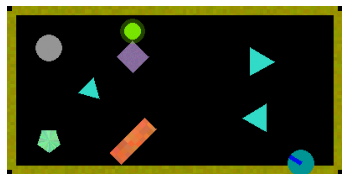

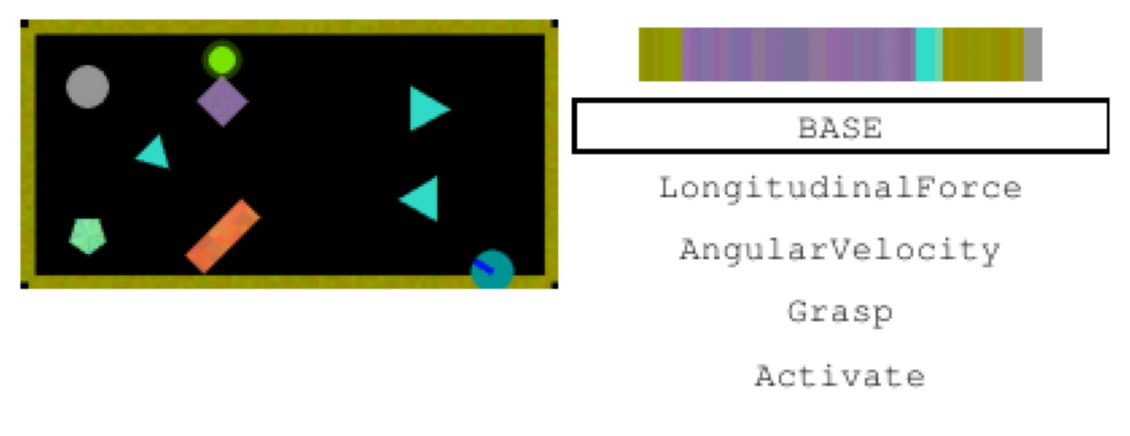

In [9]:
my_playground = Basics()
my_agent = BaseAgent(initial_position=(100, 50, 1.15), controller=Keyboard(), interactive = True)

circular_object = Physical(physical_shape='circle', radius=10, texture = [120, 230, 0], graspable=True, mass=5)
my_playground.add_element(circular_object, ((150, 30), 1.8))

camera = RgbCamera(circular_object, invisible_elements = circular_object)
my_agent.add_sensor(camera)

my_playground.add_agent(my_agent)

# we use the option screen=True to use a keyboard controlled agent later on.
engine = Engine(time_limit=1000000, playground= my_playground, screen=True)


engine.update_observations()
plt_image(engine.generate_playground_image(plt_mode = True))
plt.figure(figsize=(20,20))
plt_image(engine.generate_agent_image(my_agent, plt_mode = True))


while engine.game_on:
    
    engine.update_screen()

    actions = {}
    for agent in engine.agents:
        actions[agent] = agent.controller.generate_actions()

    terminate = engine.step(actions)
    engine.update_observations()
    
    cv2.imshow('sensor', engine.generate_agent_image(my_agent))
    cv2.waitKey(20)
    
    if terminate:
        engine.terminate()
    
engine.terminate()
cv2.destroyAllWindows()


You now see the agent from the point of view of the green object.